# Avocado price prediction

In [244]:
#Import packages
import pandas
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble  import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings



In [198]:
Avocado=pandas.read_csv("avocado.csv")#Read dataset

In [199]:
Avocado.head()#Viewing the first five row of the data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [200]:
Avocado.columns#Checking the name of the columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Dropping the unnammed column

In [201]:
Avocado.drop('Unnamed: 0',axis=1,inplace=True)

In [202]:
Avocado.shape#Checking the shape of the data
#the dataset contains 16468 rows and 14 columns

(18249, 13)

In [203]:
Avocado.info()#Checking the data types of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Checking for null values


In [204]:
Avocado.isna().sum()#The dataset contain no null values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing value in the dataset

In [205]:
import pandas as pd
Avocado['Date']=pd.to_datetime(Avocado['Date'])#Add two more columns month and day 
Avocado['Month']=Avocado['Date'].apply(lambda x:x.month)
Avocado['Day']=Avocado['Date'].apply(lambda x:x.day)

In [206]:
Avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [207]:
Avocado.describe()#Checking more information of the data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [208]:
Avocado.nunique()#Checking unique column values of the data

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

# Visual Analysis

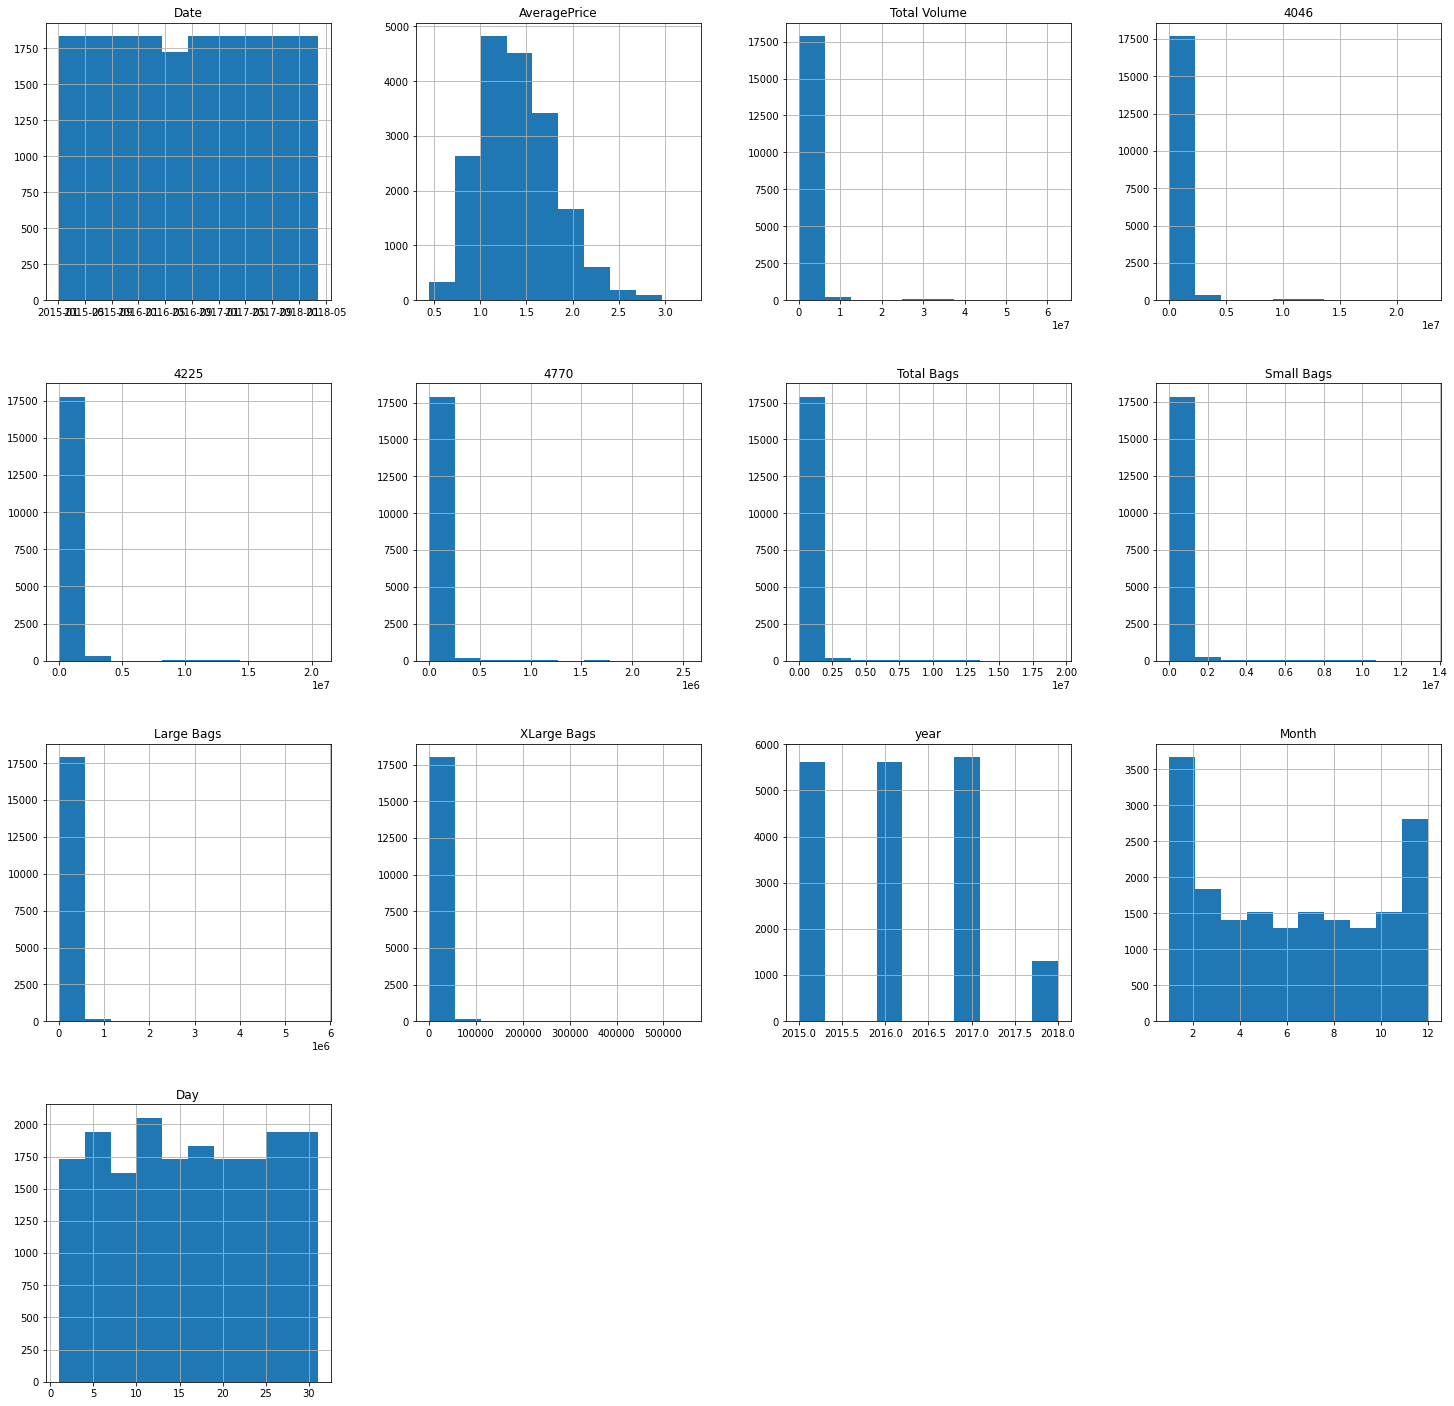

In [209]:
Avocado.hist(figsize=(25,25))#Distribution of every column of the data
plt.show()

C:\Users\lahap\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

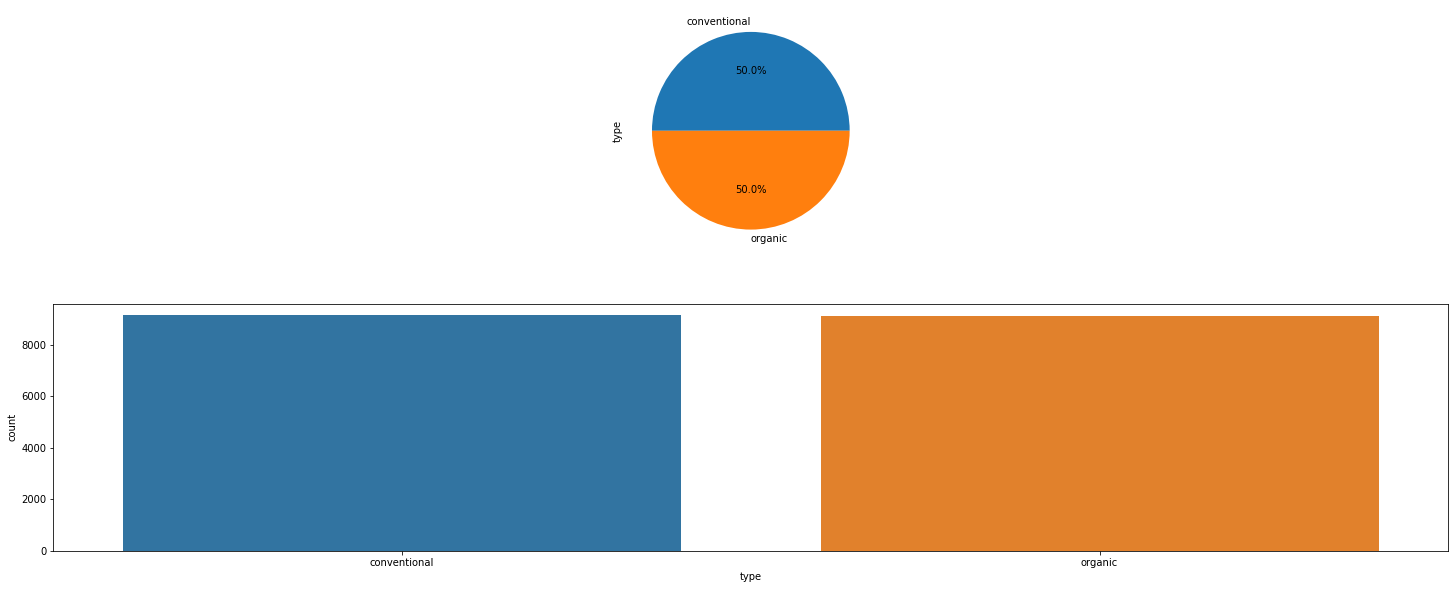

In [210]:
plt.figure(figsize=(25,10))#Type of the avocados
plt.subplot(2,1,1)
Avocado['type'].value_counts().plot.pie(autopct='%.1f%%')
plt.subplot(2,1,2)
sns.countplot(Avocado['type'])

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

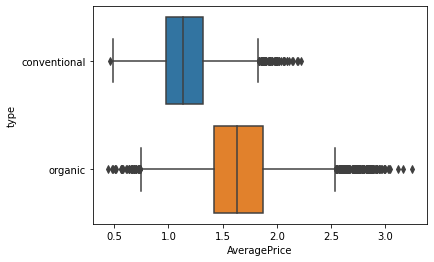

In [211]:
sns.boxplot(y="type", x="AveragePrice", data=Avocado)
#Price range depending the type of avocadoes
#Organic avocado price range varied more then conventional


Text(0.5, 1.0, 'Average Price')

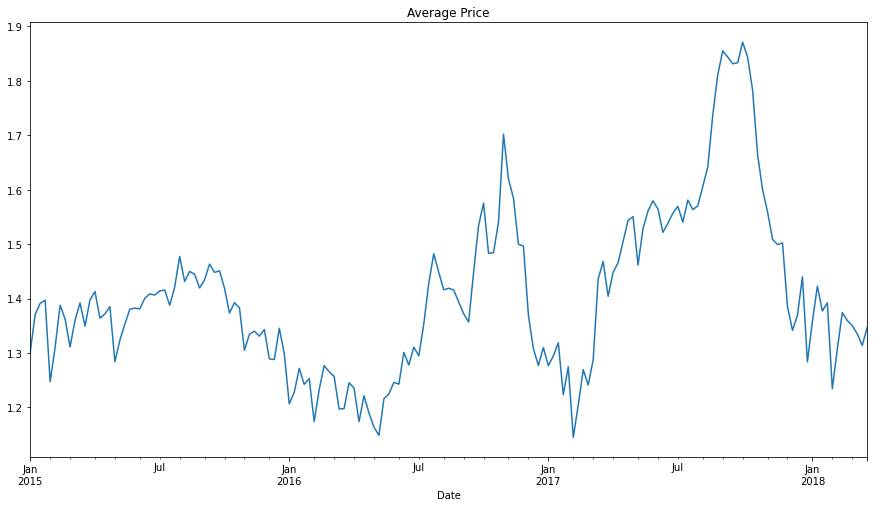

In [212]:
#This below plot shows the average price distribution of avocados through the years
#Highest price November 2017
#Lowest price February 2017

Date_price=Avocado.groupby('Date').mean()
plt.figure(figsize=(15,8))
Date_price['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price')

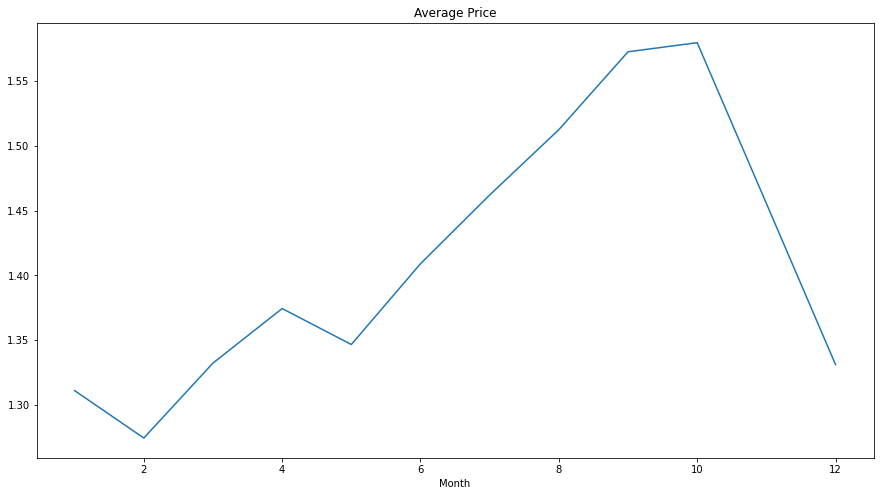

In [213]:
#Average price of avocados through month
#Avocado price is generelly higher during end of the year and lower in the starting of the year

Month_price=Avocado.groupby('Month').mean()
plt.figure(figsize=(15,8))
Month_price['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price')

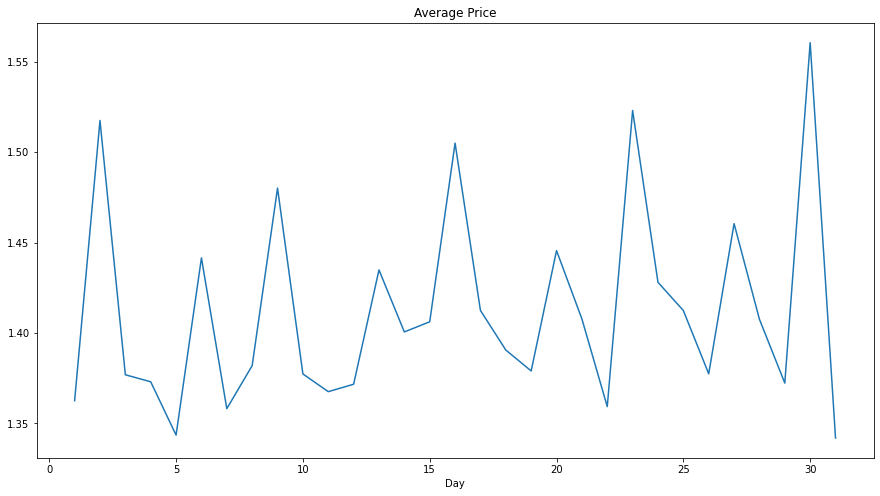

In [214]:
#Avocado price during days of the month

Day_price=Avocado.groupby('Day').mean()
plt.figure(figsize=(15,8))
Day_price['AveragePrice'].plot()
plt.title('Average Price')

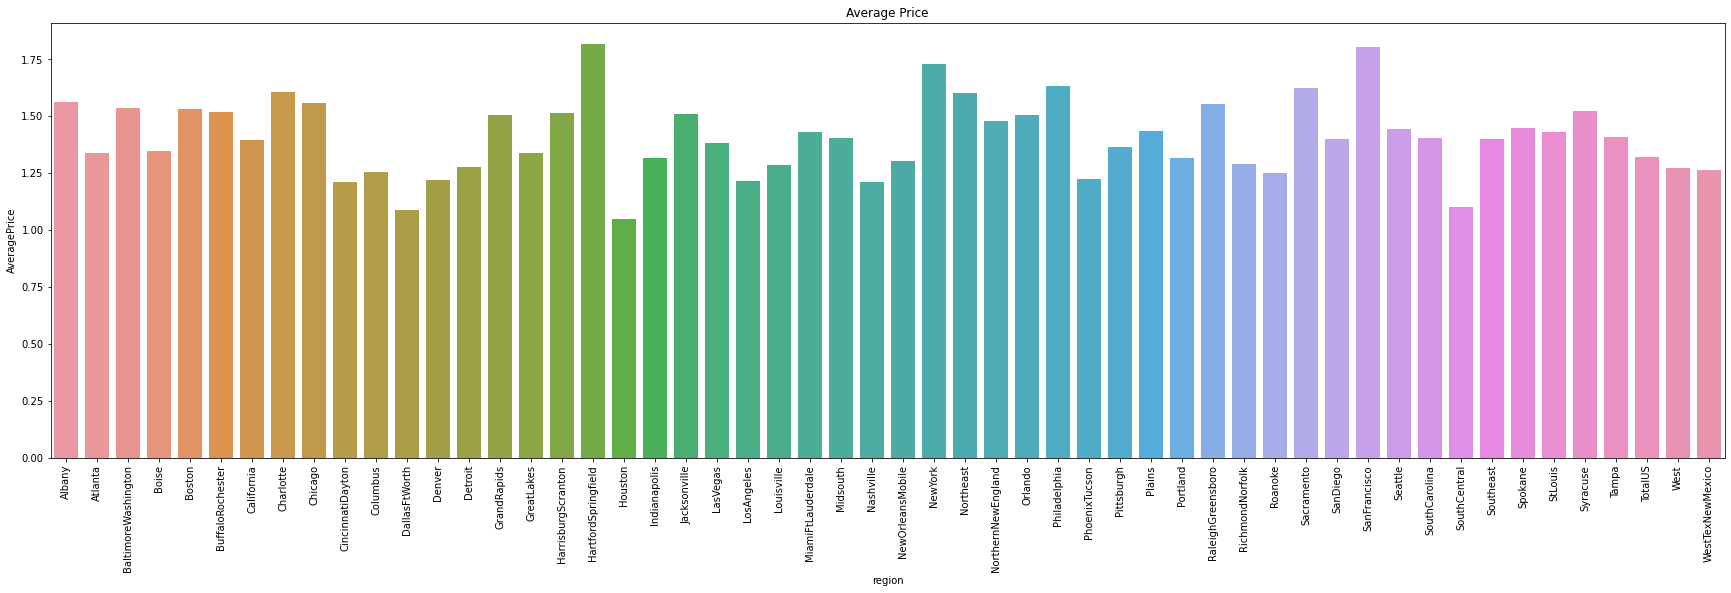

In [215]:
#Avocado price in different region
Region_price=Avocado.groupby('region').mean()
plt.figure(figsize=(30,8))
sns.barplot(x = Region_price.index,y=Region_price["AveragePrice"],data = Region_price)
plt.title('Average Price')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

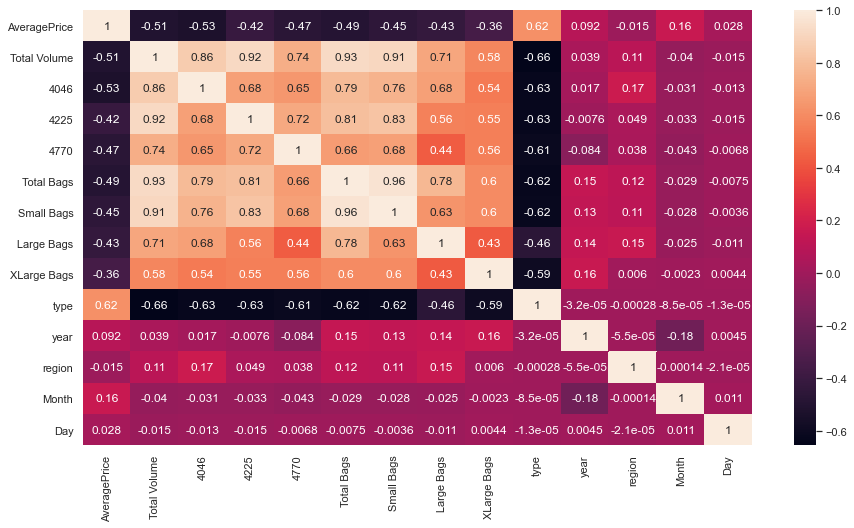

In [271]:
#Correlation anlysis
corr_df = Avocado.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,annot=True)

Outlier Detection

<AxesSubplot:>

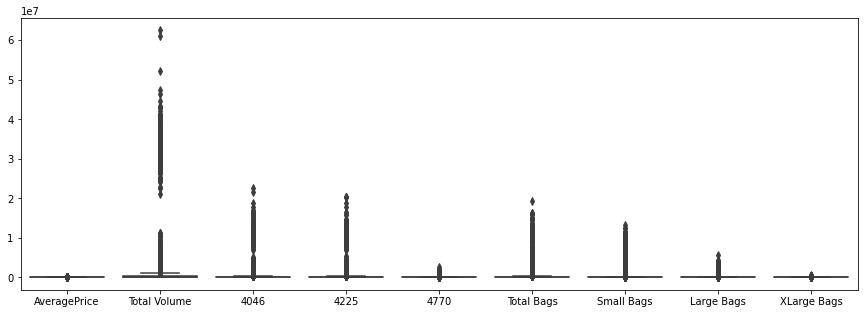

In [217]:
plt.figure(figsize=(15,5))# We can check the outlier by box plot
sns.boxplot(data = Avocado[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [218]:
Avocado.drop(columns=["Date"],inplace=True)#Dropping the date column
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


The outliers higer than the upper whisker is replaced by upper whisker value 
The outliers lower than the lower whisker is replaced by the value of the lower whisker.

In [219]:
import numpy as np# 
from numpy import percentile

columns = Avocado.columns
for j in columns:
    if isinstance(Avocado[j][0], str) :
        continue
    else:
        for i in range(len(Avocado)):
            quartiles = percentile(Avocado[j], [25,75])
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if Avocado[j][i] > upper_fence:
                Avocado[j][i] = upper_fence
            elif Avocado[j][i] < lower_fence:
                Avocado[j][i] = lower_fence

C:\Users\lahap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

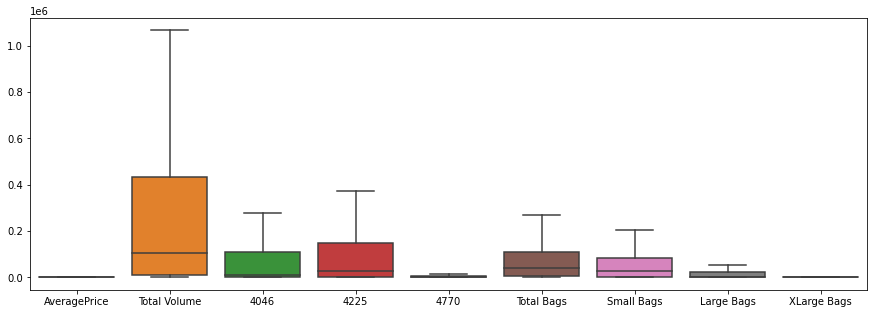

In [220]:
plt.figure(figsize=(15,5))#Checking if the outliers have been improved
sns.boxplot(data = Avocado[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [221]:
# label encoding te acocado type and regoin
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Avocado['type']= label_encoder.fit_transform(Avocado['type'])
Avocado['type'].unique()

array([0, 1])

In [222]:
Avocado['region']= label_encoder.fit_transform(Avocado['region'])
Avocado['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [223]:
Avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [224]:
Avocado.columns
#X=Avocado.drop(columns=["AveragePrice"],inplace=True)

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

Preparing data for modeling

In [225]:
y=Avocado['AveragePrice']#Target variable


In [226]:
X=Avocado.iloc[ : ,1:]#Predictors features

In [227]:
X.shape

(18249, 13)

In [228]:
from sklearn.model_selection import train_test_split# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test = np.array(y_test,dtype = float)

As this is a regression problem for average price prediction importing all the regressor model

In [236]:
model=[LinearRegression(),KNeighborsClassifier(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [272]:
classifiers = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['AdaBoostClassifier :', AdaBoostRegressor()],
               ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
               ['Xgboost: ', XGBRegressor()],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge(random_state=17)],
               ['LineaRegresion: ', LinearRegression()],
               ['BayesianRidge: ', BayesianRidge()]]



Checking for which model gives the lowest mean square error

In [273]:
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

DecisionTree : 0.18186815938272502
RandomForest : 0.12606181540859066
KNeighbours : 0.2514777149090758
SVM : 0.2949316909725152
AdaBoostClassifier : 0.254044987474866
GradientBoostingClassifier:  0.19226282408661038
Xgboost:  0.11752028461366114
Lasso:  0.3283044856975679
Ridge:  0.28424382723946934
LineaRegresion:  0.28424280972112065
BayesianRidge:  0.2842495597837488


Choosing Random forest as the best model 

In [260]:
classifier = RandomForestRegressor()
model=classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

 Predicting the test values

In [261]:
from sklearn.metrics import mean_squared_error
mean_absolute_error(y_test, predictions)

0.09021304109589039

In [262]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

0.09021304109589039

# Prediction vs test

,Y Test,Pred
0,1.21,1.1975
1,1.17,1.2800
2,1.61,1.6162
3,2.01,1.8315
4,2.02,1.9357


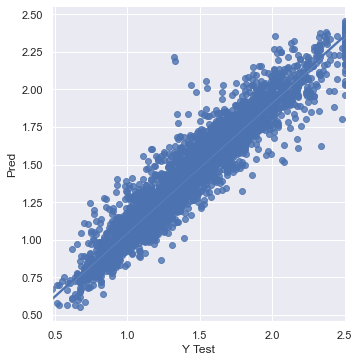

In [265]:
sns.set(font_scale = 1)
data = pd.DataFrame({'Y Test':y_test , 'Pred':predictions},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data)
data.head()

Saving the model

In [268]:
import joblib
joblib.dump(model,"Finalmod.pkl")

['Finalmod.pkl']